# Entregável 1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importações necessárias
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import subprocess

In [ ]:
# Montagem do google drive no ambiente do colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importando o modelo yolov5 e instalando as suas dependências

In [ ]:
# git clone do yolov5
! git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 17410, done.
remote: Counting objects: 100% (84/84), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 17410 (delta 63), reused 22 (delta 22), pack-reused 17326 (from 3)
Receiving objects: 100% (17410/17410), 16.29 MiB | 9.08 MiB/s, done.
Resolving deltas: 100% (11928/11928), done.


In [ ]:
# instalando dependências
! pip install -r yolov5/requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 130.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 108.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 45.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 114.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 64.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

## Modelo treinado com 30 épocas

#### Treinamento do modelo com 30 épocas

In [ ]:
!python yolov5/train.py --data /content/drive/MyDrive/Yolo/dataset/config.yaml --weights yolov5s.pt --img 640 --epochs 30

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-04-20 20:33:54.964896: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745181234.986618    1848 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745181234.993122    1848 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS wh

#### Realizando detecções nas imagens de teste

In [ ]:

def get_latest_train_run_folder():
    subfolders = [f.path for f in os.scandir('yolov5/runs/train') if f.is_dir()]
    latest_folder = max(subfolders, key=os.path.getctime, default=None)
    return latest_folder

latest_run = get_latest_train_run_folder()
result = subprocess.run(f'python yolov5/detect.py --weights {latest_run}/weights/best.pt --img 640 --source /content/drive/MyDrive/Yolo/dataset/test --data yolov5/data/telhado.yaml', shell=True, capture_output=True, text=True)
if latest_run:
    # COMANDO
    result = subprocess.run(f'python yolov5/detect.py --weights {latest_run}/weights/best.pt --img 640 --source /content/drive/MyDrive/Yolo/dataset/test --data yolov5/data/telhado.yaml', shell=True, capture_output=True, text=True)
    print(result.stdout)
    print(result.stderr)
else:
    print("Não foi possível encontrar a pasta de treinamento mais recente.")


detect: weights=['yolov5/runs/train/exp/weights/best.pt'], source=/content/drive/MyDrive/Yolo/dataset/test, data=yolov5/data/telhado.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-416-gfe1d4d99 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/8 /content/drive/MyDrive/Yolo/dataset/test/Mapeamento-agricola-drone (3).jpg: 544x640 1 drone, 45.1ms
image 2/8 /content/drive/MyDrive/Yolo/dataset/test/dji-4204801_1280.jpg: 384x640 1 drone, 46.0ms
image 3/8 /content/drive/MyDrive/Yolo/dataset/test/fig 39.jpg: 

#### Visualizando imagens das detecções do modelo

In [ ]:
# Script para exibir as imagens da última detecção
def show_latest_detection_images():
    # Encontrar a pasta de detecção mais recente
    detect_folder = '/content/yolov5/runs/detect'
    if not os.path.exists(detect_folder):
        print(f"Pasta de detecção '{detect_folder}' não encontrada.")
        return

    subfolders = [f.path for f in os.scandir(detect_folder) if f.is_dir()]
    if not subfolders:
        print(f"Nenhuma pasta de detecção encontrada em '{detect_folder}'.")
        return

    latest_detect_folder = max(subfolders, key=os.path.getctime)
    print(f"Exibindo imagens da pasta de detecção: {latest_detect_folder}")

    # Listar todos os arquivos na pasta de detecção mais recente
    image_files = [f for f in os.listdir(latest_detect_folder) if f.endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.JPG', '.webp'))]
    if not image_files:
        print(f"Nenhuma imagem encontrada em '{latest_detect_folder}'.")
        return

    # Loop para carregar e exibir cada imagem
    for image_file in image_files:
        img_path = os.path.join(latest_detect_folder, image_file)
        try:
            image = mpimg.imread(img_path)
            plt.figure(figsize=(15, 10))
            plt.imshow(image)
            plt.axis('off')
            plt.show()
        except Exception as e:
            print(f"Erro ao carregar ou exibir a imagem '{image_file}': {e}")

show_latest_detection_images()

Output hidden; open in https://colab.research.google.com to view.

## Modelo treinado com 60 épocas

#### Treinamento do modelo com 60 épocas

In [ ]:
!python yolov5/train.py --data /content/drive/MyDrive/Yolo/dataset/config.yaml --weights yolov5s.pt --img 640 --epochs 60

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-04-20 20:48:14.224730: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745182094.245795    5694 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745182094.252256    5694 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&

#### Realizando detecções nas imagens de teste

In [ ]:

def get_latest_train_run_folder():
    subfolders = [f.path for f in os.scandir('yolov5/runs/train') if f.is_dir()]
    latest_folder = max(subfolders, key=os.path.getctime, default=None)
    return latest_folder

latest_run = get_latest_train_run_folder()
result = subprocess.run(f'python yolov5/detect.py --weights {latest_run}/weights/best.pt --img 640 --source /content/drive/MyDrive/Yolo/dataset/test --data yolov5/data/telhado.yaml', shell=True, capture_output=True, text=True)
if latest_run:
    # COMANDO
    result = subprocess.run(f'python yolov5/detect.py --weights {latest_run}/weights/best.pt --img 640 --source /content/drive/MyDrive/Yolo/dataset/test --data yolov5/data/telhado.yaml', shell=True, capture_output=True, text=True)
    print(result.stdout)
    print(result.stderr)
else:
    print("Não foi possível encontrar a pasta de treinamento mais recente.")


detect: weights=['yolov5/runs/train/exp2/weights/best.pt'], source=/content/drive/MyDrive/Yolo/dataset/test, data=yolov5/data/telhado.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-416-gfe1d4d99 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/8 /content/drive/MyDrive/Yolo/dataset/test/Mapeamento-agricola-drone (3).jpg: 544x640 1 drone, 45.5ms
image 2/8 /content/drive/MyDrive/Yolo/dataset/test/dji-4204801_1280.jpg: 384x640 1 trator, 1 drone, 46.0ms
image 3/8 /content/drive/MyDrive/Yolo/dataset/test/f

#### Visualizando imagens das detecções do modelo

In [ ]:
# Script para exibir as imagens da última detecção
def show_latest_detection_images():
    # Encontrar a pasta de detecção mais recente
    detect_folder = '/content/yolov5/runs/detect'
    if not os.path.exists(detect_folder):
        print(f"Pasta de detecção '{detect_folder}' não encontrada.")
        return

    subfolders = [f.path for f in os.scandir(detect_folder) if f.is_dir()]
    if not subfolders:
        print(f"Nenhuma pasta de detecção encontrada em '{detect_folder}'.")
        return

    latest_detect_folder = max(subfolders, key=os.path.getctime)
    print(f"Exibindo imagens da pasta de detecção: {latest_detect_folder}")

    # Listar todos os arquivos na pasta de detecção mais recente
    image_files = [f for f in os.listdir(latest_detect_folder) if f.endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.JPG', '.webp'))]
    if not image_files:
        print(f"Nenhuma imagem encontrada em '{latest_detect_folder}'.")
        return

    # Loop para carregar e exibir cada imagem
    for image_file in image_files:
        img_path = os.path.join(latest_detect_folder, image_file)
        try:
            image = mpimg.imread(img_path)
            plt.figure(figsize=(15, 10))
            plt.imshow(image)
            plt.axis('off')
            plt.show()
        except Exception as e:
            print(f"Erro ao carregar ou exibir a imagem '{image_file}': {e}")

show_latest_detection_images()


Output hidden; open in https://colab.research.google.com to view.

## Modelo treinado com 90 épocas

#### Treinamento do modelo com 90 épocas

In [ ]:
!python yolov5/train.py --data /content/drive/MyDrive/Yolo/dataset/config.yaml --weights yolov5s.pt --img 640 --epochs 90

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-04-20 22:51:46.093341: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745189506.114594   37047 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745189506.121046   37047 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&

#### Realizando detecções nas imagens de teste

In [ ]:
def get_latest_train_run_folder():
    subfolders = [f.path for f in os.scandir('yolov5/runs/train') if f.is_dir()]
    latest_folder = max(subfolders, key=os.path.getctime, default=None)
    return latest_folder

latest_run = get_latest_train_run_folder()
result = subprocess.run(f'python yolov5/detect.py --weights {latest_run}/weights/best.pt --img 640 --source /content/drive/MyDrive/Yolo/dataset/test --data yolov5/data/telhado.yaml', shell=True, capture_output=True, text=True)
if latest_run:
    # COMANDO
    result = subprocess.run(f'python yolov5/detect.py --weights {latest_run}/weights/best.pt --img 640 --source /content/drive/MyDrive/Yolo/dataset/test --data yolov5/data/telhado.yaml', shell=True, capture_output=True, text=True)
    print(result.stdout)
    print(result.stderr)
else:
    print("Não foi possível encontrar a pasta de treinamento mais recente.")


detect: weights=['yolov5/runs/train/exp4/weights/best.pt'], source=/content/drive/MyDrive/Yolo/dataset/test, data=yolov5/data/telhado.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-416-gfe1d4d99 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/8 /content/drive/MyDrive/Yolo/dataset/test/Mapeamento-agricola-drone (3).jpg: 544x640 1 drone, 45.0ms
image 2/8 /content/drive/MyDrive/Yolo/dataset/test/dji-4204801_1280.jpg: 384x640 1 trator, 1 drone, 45.7ms
image 3/8 /content/drive/MyDrive/Yolo/dataset/test/f

#### Visualizando imagens das detecções do modelo

In [ ]:
# Script para exibir as imagens da última detecção
def show_latest_detection_images():
    # Encontrar a pasta de detecção mais recente
    detect_folder = '/content/yolov5/runs/detect'
    if not os.path.exists(detect_folder):
        print(f"Pasta de detecção '{detect_folder}' não encontrada.")
        return

    subfolders = [f.path for f in os.scandir(detect_folder) if f.is_dir()]
    if not subfolders:
        print(f"Nenhuma pasta de detecção encontrada em '{detect_folder}'.")
        return

    latest_detect_folder = max(subfolders, key=os.path.getctime)
    print(f"Exibindo imagens da pasta de detecção: {latest_detect_folder}")

    # Listar todos os arquivos na pasta de detecção mais recente
    image_files = [f for f in os.listdir(latest_detect_folder) if f.endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.JPG', '.webp'))]
    if not image_files:
        print(f"Nenhuma imagem encontrada em '{latest_detect_folder}'.")
        return

    # Loop para carregar e exibir cada imagem
    for image_file in image_files:
        img_path = os.path.join(latest_detect_folder, image_file)
        try:
            image = mpimg.imread(img_path)
            plt.figure(figsize=(15, 10))
            plt.imshow(image)
            plt.axis('off')
            plt.show()
        except Exception as e:
            print(f"Erro ao carregar ou exibir a imagem '{image_file}': {e}")

show_latest_detection_images()

Output hidden; open in https://colab.research.google.com to view.

## Modelo treinado com 120 épocas

#### Treinando o modelo de 120 épocas

In [ ]:
!python yolov5/train.py --data /content/drive/MyDrive/Yolo/dataset/config.yaml --weights yolov5s.pt --img 640 --epochs 120

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-04-29 01:31:03.752542: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745890263.773048    4288 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745890263.779413    4288 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS wh

## Fazendo previsões com o modelo

In [ ]:
def get_latest_train_run_folder():
    subfolders = [f.path for f in os.scandir('yolov5/runs/train') if f.is_dir()]
    latest_folder = max(subfolders, key=os.path.getctime, default=None)
    return latest_folder

latest_run = get_latest_train_run_folder()
result = subprocess.run(f'python yolov5/detect.py --weights {latest_run}/weights/best.pt --img 640 --source /content/drive/MyDrive/Yolo/dataset/test --data yolov5/data/telhado.yaml', shell=True, capture_output=True, text=True)
if latest_run:
    # COMANDO
    result = subprocess.run(f'python yolov5/detect.py --weights {latest_run}/weights/best.pt --img 640 --source /content/drive/MyDrive/Yolo/dataset/test --data yolov5/data/telhado.yaml', shell=True, capture_output=True, text=True)
    print(result.stdout)
    print(result.stderr)
else:
    print("Não foi possível encontrar a pasta de treinamento mais recente.")


detect: weights=['yolov5/runs/train/exp/weights/best.pt'], source=/content/drive/MyDrive/Yolo/dataset/test, data=yolov5/data/telhado.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-416-gfe1d4d99 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/8 /content/drive/MyDrive/Yolo/dataset/test/Mapeamento-agricola-drone (3).jpg: 544x640 1 drone, 28.2ms
image 2/8 /content/drive/MyDrive/Yolo/dataset/test/dji-4204801_1280.jpg: 384x640 1 trator, 1 drone, 27.7ms
image 3/8 /content/drive/MyDrive/Yolo/dataset/test/fig

## Exibindo as previsões do modelo

In [ ]:
# Script para exibir as imagens da última detecção
def show_latest_detection_images():
    # Encontrar a pasta de detecção mais recente
    detect_folder = '/content/yolov5/runs/detect'
    if not os.path.exists(detect_folder):
        print(f"Pasta de detecção '{detect_folder}' não encontrada.")
        return

    subfolders = [f.path for f in os.scandir(detect_folder) if f.is_dir()]
    if not subfolders:
        print(f"Nenhuma pasta de detecção encontrada em '{detect_folder}'.")
        return

    latest_detect_folder = max(subfolders, key=os.path.getctime)
    print(f"Exibindo imagens da pasta de detecção: {latest_detect_folder}")

    # Listar todos os arquivos na pasta de detecção mais recente
    image_files = [f for f in os.listdir(latest_detect_folder) if f.endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.JPG', '.webp'))]
    if not image_files:
        print(f"Nenhuma imagem encontrada em '{latest_detect_folder}'.")
        return

    # Loop para carregar e exibir cada imagem
    for image_file in image_files:
        img_path = os.path.join(latest_detect_folder, image_file)
        try:
            image = mpimg.imread(img_path)
            plt.figure(figsize=(15, 10))
            plt.imshow(image)
            plt.axis('off')
            plt.show()
        except Exception as e:
            print(f"Erro ao carregar ou exibir a imagem '{image_file}': {e}")

show_latest_detection_images()

Output hidden; open in https://colab.research.google.com to view.

## Análise de resultado:

### Valores de precisão por época

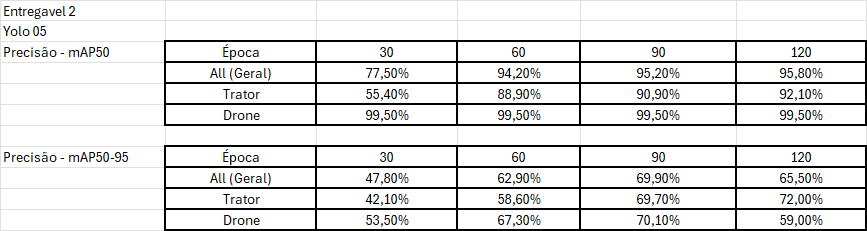



O mAP50 geral de 95.1% é excelente, indicando um bom desempenho com um limiar de IoU de 0.50. As pontuações para ambas as classes são altas.
O mAP50-95 geral de 75.2% também é um bom resultado, sugerindo que o modelo geralmente produz caixas delimitadoras bem ajustadas. No entanto, dada a pequena quantidade de dados de validação, essa métrica pode ser mais suscetível a flutuações.

Análise da Precisão mAP50:

All (Geral): A precisão geral do modelo melhora significativamente com o aumento das épocas. Começando em 77,50% com 30 épocas, ela atinge o pico de 95,80% com 120 épocas, mostrando um aprendizado consistente ao longo do treinamento.

Trator: A precisão na detecção de tratores também apresenta uma melhora notável com mais épocas. De 55,40% em 30 épocas, alcança 92,10% em 120 épocas. O ganho de precisão para tratores é considerável durante as primeiras 60 épocas.

Drone: A precisão na detecção de drones já é muito alta desde o início (99,50% com 30 épocas) e se mantém constante em todas as épocas avaliadas. Isso sugere que o modelo aprendeu a identificar drones com alta confiança relativamente cedo no treinamento.

Análise da Precisão mAP50-95:

All (Geral): A precisão geral mostra uma tendência de melhora com o aumento das épocas, embora com uma pequena queda entre 90 e 120 épocas (de 69,90% para 65,50%). Isso pode indicar um possível overfitting para os critérios de IoU mais altos após 90 épocas.

Trator: A precisão na detecção de tratores melhora de forma constante até 120 épocas, alcançando 72,00%. Isso sugere que o modelo continua a refinar suas detecções de tratores, mesmo para critérios de IoU mais altos.

Drone: A precisão na detecção de drones apresenta uma melhora inicial entre 30 e 60 épocas (de 53,50% para 67,30%), mas depois mostra uma leve melhora até 90 épocas (70,10%) e, finalmente, uma queda significativa para 59,00% em 120 épocas. Essa queda sugere que, embora o modelo seja excelente em detectar drones com um IoU de 0.50, sua capacidade de localizá-los com alta precisão (IoU mais alto) pode estar se deteriorando após um certo ponto de treinamento.

O modelo demonstra um desempenho notavelmente alto nas métricas de precisão e revocação no conjunto de validação. A precisão para a classe "drone" é particularmente impressionante, sugerindo que o modelo aprendeu a identificar drones de forma eficaz mesmo com um dataset limitado. A detecção de "trator" também apresenta métricas sólidas.

Devemos levar em consideração que este modelo foi baseado em dataset pequeno, portanto, as métricas podem não ser representativas do desempenho do modelo em dados mais diversos e em maior escala.Senddo assim, o risco de overfitting é alto. Embora os resultados de validação pareçam bons, o modelo pode ter se ajustado demais às características específicas desse pequeno conjunto de dados, comprometendo sua capacidade de generalização para dados não vistos.

Em suma, podemos concluir que o modelo ideal é o de 90 épocas, tendo em vista que este modelo apresenta uma melhor relação entre os parâmetros de
geral, trator e drone e entre mAP50 e mAP50-95.











## Comparação de modelos

### Tabela comparativa entre os modelos yolov5 e yolo 12

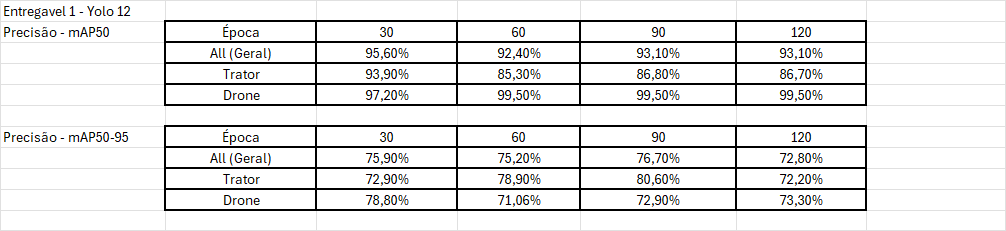


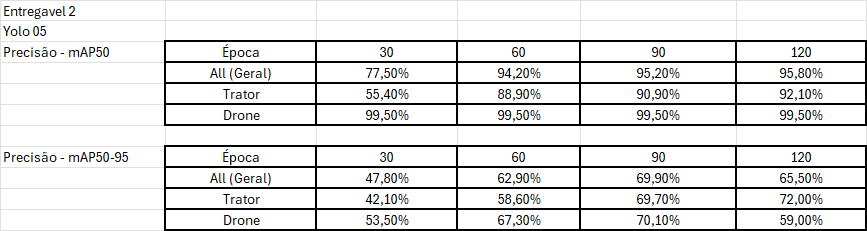











### YOLOV 5 VS YOLO 12

Ao confrontarmos os resultados de treinamento do YOLOv12 e do YOLOv5 ao longo de 120 épocas, algumas tendências e disparidades significativas emergem, demandando uma análise criteriosa:

1. Precisão mAP50:
All (Geral): O YOLOv12 demonstra uma convergência mais precoce para uma alta precisão geral (≈ 93-95%), mantendo-se relativamente estável após a época 30. Em contraste, o YOLOv5 apresenta uma trajetória de aprendizado mais gradual, superando o YOLOv12 em precisão geral a partir da época 60 e atingindo um pico mais elevado (≈ 95.8%) na época 120. Isso sugere que o YOLOv5, potencialmente devido a sua arquitetura mais profunda ou otimizações intrínsecas, possui uma maior capacidade de aprendizado para a tarefa global de detecção.

Trator: O YOLOv12 inicia com uma precisão elevada (≈ 94%) na época 30, mas subsequentemente sofre uma queda e se estabiliza em um patamar inferior (≈ 86-87%). O YOLOv5, por outro lado, exibe um aprendizado mais lento inicialmente (≈ 55% na época 30), mas demonstra uma melhoria substancial e consistente ao longo das épocas, ultrapassando significativamente o YOLOv12 nas épocas finais (≈ 92%). Essa diferença pode indicar que o YOLOv5 é mais eficaz em aprender as características distintivas dos tratores, embora requeira mais iterações de treinamento para fazê-lo.

Drone: Ambas as arquiteturas demonstram uma capacidade excepcional para detectar drones, com precisões consistentemente elevadas (próximas a 99-100%) em todas as épocas. Essa similaridade sugere que as características visuais dos drones podem ser mais facilmente discerníveis para ambos os modelos.

2. Precisão mAP50-95:

All (Geral): O YOLOv12 atinge um pico de precisão geral (≈ 76.7%) na época 90, com uma ligeira queda na época 120. O YOLOv5, novamente, mostra uma progressão mais lenta, mas alcança um valor comparável (≈ 69.9%) na época 90, com uma subsequente queda na época 120. A menor diferença entre o mAP50 e o mAP50-95 para o YOLOv5 nas épocas finais pode indicar uma melhoria na precisão da localização em relação ao YOLOv12 em estágios avançados do treinamento.

Trator: A disparidade é notável para a classe "Trator". O YOLOv12 atinge um pico de mAP50-95 (≈ 80.6%) na época 90, significativamente superior ao melhor desempenho do YOLOv5 (≈ 72.0% na época 120). Isso sugere que, para a detecção de tratores com caixas delimitadoras altamente precisas, o YOLOv12 pode ter uma vantagem intrínseca ou ter aprendido representações mais adequadas para essa finalidade dentro do regime de treinamento explorado.

Drone: O YOLOv12 demonstra um desempenho relativamente estável no mAP50-95 para drones (≈ 71-79%). O YOLOv5, por outro lado, exibe uma maior variabilidade, com um pico na época 90 (≈ 70.1%) e uma queda acentuada na época 120 (≈ 59.0%). Essa instabilidade tardia no YOLOv5 para a precisão da localização de drones é um ponto de atenção que pode indicar overfitting ou uma dificuldade em refinar as caixas delimitadoras com maior rigor após um certo ponto.

O YOLOv5 demonstra maior capacidade de aprendizado geral, superando o YOLOv12 em precisão (mAP50) para a maioria das classes, especialmente nas épocas finais. Essa característica, contudo, pode indicar uma tendência ao overfitting.

O YOLOv12 converge mais rapidamente para uma alta precisão, sugerindo uma adaptação eficiente às características do dataset e possivelmente maior robustez a dados não vistos, especialmente para a classe "Trator" em termos de mAP50-95.

Apesar da alta precisão na detecção de drones (mAP50), o YOLOv5 apresenta instabilidade no mAP50-95 para essa classe nas épocas finais, levantando preocupações sobre a generalização da precisão da localização.
Especificamente:

Precisão (mAP50): YOLOv5 apresenta aprendizado mais gradual, superando o YOLOv12 em épocas posteriores, especialmente para a classe "Trator". YOLOv12 demonstra convergência mais rápida.
Robustez (mAP50-95): YOLOv12 demonstra maior robustez, especialmente para "Trator", enquanto o YOLOv5 apresenta instabilidade para "Drone" nas épocas finais.

Conclusão Comparativa e Recomendações:

Em suma, ambos os modelos demonstram um potencial significativo para a detecção de tratores e drones. O YOLOv5 parece ter uma maior capacidade de atingir uma alta precisão de detecção (mAP50) geral e para a classe "Trator" com um treinamento mais extenso. No entanto, o YOLOv12 apresenta um desempenho notavelmente superior na precisão da localização (mAP50-95) para a classe "Trator", o que pode ser crucial dependendo dos requisitos da aplicação.


